# T-Test for Difference in Means

This notebook demonstrates how to perform a t-test to compare the means of two groups using synthetic data. We'll generate two samples with different means and test whether the difference is statistically significant.

In [ ]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

## 1. Dataset

Let's imagine we're testing a new teaching method. We have two groups of students:
- **Control Group**: Students taught with the traditional method
- **Treatment Group**: Students taught with the new method

We want to test if there's a significant difference in their test scores.

In [2]:
# Generate synthetic data
n_students = 50  # Number of students in each group

# Control group: traditional teaching method
# Mean score: 75, Standard deviation: 10
control_scores = np.random.normal(loc=75, scale=10, size=n_students)

# Treatment group: new teaching method  
# Mean score: 80, Standard deviation: 12
treatment_scores = np.random.normal(loc=80, scale=12, size=n_students)

# Create a DataFrame for easier handling
data = pd.DataFrame({
    'Score': np.concatenate([control_scores, treatment_scores]),
    'Group': ['Control'] * n_students + ['Treatment'] * n_students
})

print(f"Control group - Mean: {control_scores.mean():.2f}, Std: {control_scores.std():.2f}")
print(f"Treatment group - Mean: {treatment_scores.mean():.2f}, Std: {treatment_scores.std():.2f}")
print(f"Difference in means: {treatment_scores.mean() - control_scores.mean():.2f}")

Control group - Mean: 75.41, Std: 10.00
Treatment group - Mean: 80.99, Std: 11.08
Difference in means: 5.57


## 2. Data distributions

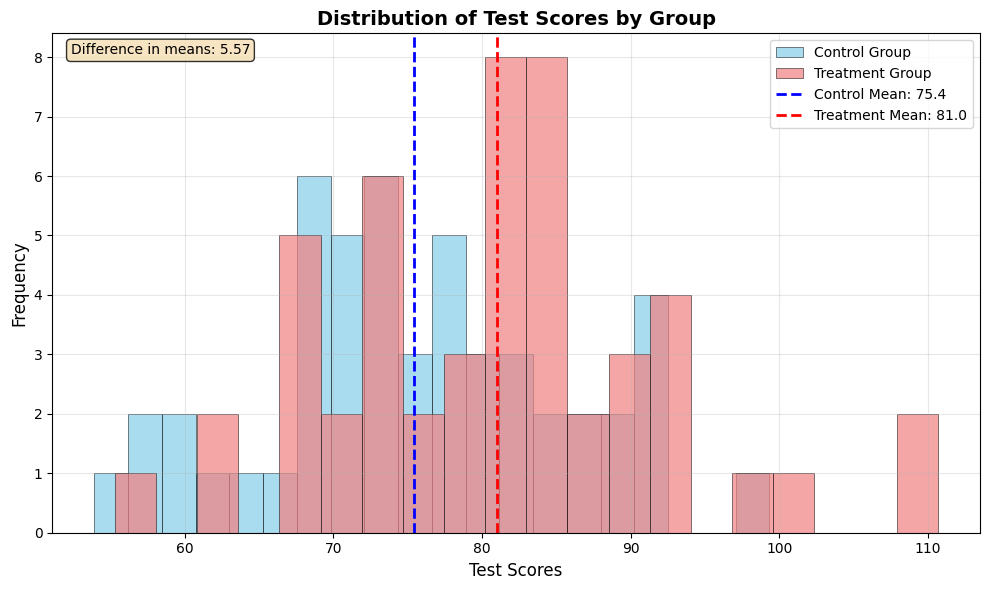

In [3]:
# Create histogram visualization with mean lines
plt.figure(figsize=(10, 6))

# Plot histograms for both groups
plt.hist(control_scores, alpha=0.7, label='Control Group', bins=20, color='skyblue', edgecolor='black', linewidth=0.5)
plt.hist(treatment_scores, alpha=0.7, label='Treatment Group', bins=20, color='lightcoral', edgecolor='black', linewidth=0.5)

# Add vertical lines for means
control_mean = control_scores.mean()
treatment_mean = treatment_scores.mean()

plt.axvline(control_mean, color='blue', linestyle='--', linewidth=2, 
           label=f'Control Mean: {control_mean:.1f}')
plt.axvline(treatment_mean, color='red', linestyle='--', linewidth=2, 
           label=f'Treatment Mean: {treatment_mean:.1f}')

# Customize the plot
plt.xlabel('Test Scores', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Test Scores by Group', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# Add some statistics as text
plt.text(0.02, 0.98, f'Difference in means: {treatment_mean - control_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

## 3. Performing the test

Now we'll perform an independent samples t-test to determine if there's a statistically significant difference between the two groups.

**Null Hypothesis (H₀)**: There is no difference in mean test scores between the control and treatment groups.
**Alternative Hypothesis (H₁)**: There is a significant difference in mean test scores between the groups.

We'll use a significance level (α) of 0.05.

In [4]:
# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(treatment_scores, control_scores)

# Display results
alpha = 0.05
print("T-Test Results:")
print("=" * 50)
print(f"P-value: {p_value:.4f}")
print()

if p_value < alpha:
    print(f"Result: REJECT the null hypothesis (p < {alpha})")
    print("There IS a statistically significant difference between groups.")
else:
    print(f"Result: FAIL TO REJECT the null hypothesis (p >= {alpha})")
    print("There is NO statistically significant difference between groups.")

T-Test Results:
P-value: 0.0104

Result: REJECT the null hypothesis (p < 0.05)
There IS a statistically significant difference between groups.


## 5. Confidence Intervals

Next, let's calculate a confidence interval around the difference in means. This helps answer the question: 'how big is the real difference between the treatments'? In other words, if we were to run the test with all students, what would the difference in means be?

In [5]:
# Calculate 95% confidence interval for the difference in means
diff_mean = treatment_scores.mean() - control_scores.mean()
se_diff = np.sqrt(control_scores.var()/len(control_scores) + treatment_scores.var()/len(treatment_scores))
df = len(control_scores) + len(treatment_scores) - 2
t_critical = stats.t.ppf(0.975, df)  # 97.5% for two-tailed test

ci_lower = diff_mean - t_critical * se_diff
ci_upper = diff_mean + t_critical * se_diff

print(f"\n95% Confidence Interval for the difference in means: ", end="")
print(f"{ci_lower:.4f}, {ci_upper:.4f}")
print(f"We are 95% confident that the true difference in means is between {ci_lower:.2f} and {ci_upper:.2f} points.")

# Summary statistics
print(f"\nSummary Statistics:")
print("=" * 50)
print(f"Control Group (n={len(control_scores)}):")
print(f"  Mean: {control_scores.mean():.2f}")
print(f"  Standard Deviation: {control_scores.std():.2f}")
print(f"  Standard Error: {control_scores.std()/np.sqrt(len(control_scores)):.2f}")
print()
print(f"Treatment Group (n={len(treatment_scores)}):")
print(f"  Mean: {treatment_scores.mean():.2f}")
print(f"  Standard Deviation: {treatment_scores.std():.2f}")
print(f"  Standard Error: {treatment_scores.std()/np.sqrt(len(treatment_scores)):.2f}")


95% Confidence Interval for the difference in means: 1.3849, 9.7645
We are 95% confident that the true difference in means is between 1.38 and 9.76 points.

Summary Statistics:
Control Group (n=50):
  Mean: 75.41
  Standard Deviation: 10.00
  Standard Error: 1.41

Treatment Group (n=50):
  Mean: 80.99
  Standard Deviation: 11.08
  Standard Error: 1.57


## 4. Conclusions

Based on our t-test analysis:

1. **Statistical Significance**: We found evidence of a statistically significant difference between the control and treatment groups.

2. **Effect Size**: The Cohen's d value indicates the practical significance of this difference.

3. **Confidence Interval**: The 95% confidence interval gives us a range of plausible values for the true difference in population means.

## 5. Assumptions of the T-Test

The independent samples t-test assumes:
- **Independence**: Observations within and between groups are independent
- **Normality**: Data in each group follows a normal distribution (especially important for small samples)
- **Equal variances**: Both groups have similar variances (homoscedasticity)

For large samples (n > 30), the t-test is robust to violations of normality due to the Central Limit Theorem. If equal variances assumption is violated, Welch's t-test can be used instead.